Epoch: 1
	Weight:0.31632430823880264281
	True value:1.00000000000000000000
	Output value:0.66022140965063624840
	Loss: 0.56410769023892681773
	Derivative:-0.42400002357896565686
Epoch: 2
	Weight:1.31632430823880275383
	True value:1.00000000000000000000
	Output value:0.94071484081958878232
	Loss: 0.11505558826177575416
	Derivative:-0.27442489682703946619
Epoch: 3
	Weight:2.31632430823880275383
	True value:1.00000000000000000000
	Output value:0.99234172713594592796
	Loss: 0.01525789658484788536
	Derivative:-0.05658408996974978455
Epoch: 4
	Weight:3.31632430823880275383
	True value:1.00000000000000000000
	Output value:0.99905585012937281331
	Loss: 0.00188740832227618505
	Derivative:-0.00751324189421581634
Epoch: 5
	Weight:4.31632430823880319792
	True value:1.00000000000000000000
	Output value:0.99988428690703190505
	Loss: 0.00023141279641625268
	Derivative:-0.00092953301048798176


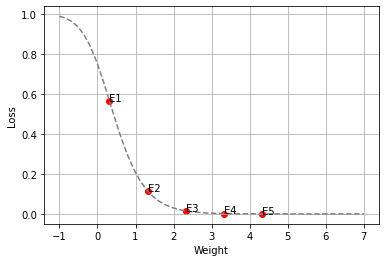

In [1]:
import numpy as np
import random
from scipy.misc import derivative

# Known values for input (feature) and output (label)
X = 2.1
Y = 1

# By how much should we adjust the weight with each iteration
LR = 1

# Neuron function
def neuron(x, w):
    from scipy.special import expit as sigmoid
    return sigmoid(x * w)

# Function to calculate loss
def lossfunc(w):
    return abs(Y - neuron(X, w)**2)

# Initialize weight with a random value between 0 and 1
w = random.uniform(0,1)

# Call the function over 5 iterations (epochs), updating the weight and recording the loss each time
e = 1
weights = []
losses = []
while e < 6:
    print('Epoch:', e)
    e += 1
    weights.append(w)
    print('\tWeight:%.20f' % w)

    # Pass the value and weight forward through the neuron
    y = neuron(X, w)
    print('\tTrue value:%.20f' % Y)
    print('\tOutput value:%.20f' % y)

    # Calculate loss
    loss = lossfunc(w)
    losses.append(loss)
    print('\tLoss: %.20f' % loss)

    # Which way should we adjust w to reduce loss?
    dw = derivative(lossfunc, w)
    print('\tDerivative:%.20f' % dw)

    if dw > 0:
        # Slope is positive - decrease w
        w = w - LR
    elif dw < 0:
        # Slope is negative - increase w
        w = w + LR

# Plot the function and the weights and losses in our epochs
from matplotlib import pyplot as plt
%matplotlib inline

# Create an array of weight values
wRange = np.linspace(-1, 7)

# Use the function to get the corresponding loss values
lRange = [lossfunc(i) for i in wRange]

# Plot the function line
plt.xlabel('Weight')
plt.ylabel('Loss')
plt.grid()
plt.plot(wRange,lRange, color='grey', ls="--")

# Plot the weights and losses we recorded
plt.scatter(weights,losses, c='red')
e = 0
while e < len(weights):
    plt.annotate('E' + str(e+1),(weights[e], losses[e]))
    e += 1

plt.show()

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()

   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.40, random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")
print('(features: ',iris.feature_names, ')')

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n], '(' + iris.target_names[y_train[n]] + ')')

Training Set: 90, Test Set: 60 

Sample of features and labels:
(features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] )
[6.  3.4 4.5 1.6] 1 (versicolor)
[4.8 3.1 1.6 0.2] 0 (setosa)
[5.8 2.7 5.1 1.9] 2 (virginica)
[5.6 2.7 4.2 1.3] 1 (versicolor)
[5.6 2.9 3.6 1.3] 1 (versicolor)
[5.5 2.5 4.  1.3] 1 (versicolor)
[6.1 3.  4.6 1.4] 1 (versicolor)
[7.2 3.2 6.  1.8] 2 (virginica)
[5.3 3.7 1.5 0.2] 0 (setosa)
[4.3 3.  1.1 0.1] 0 (setosa)
[6.4 2.7 5.3 1.9] 2 (virginica)
[5.7 3.  4.2 1.2] 1 (versicolor)
[5.4 3.4 1.7 0.2] 0 (setosa)
[5.7 4.4 1.5 0.4] 0 (setosa)
[6.9 3.1 4.9 1.5] 1 (versicolor)
[4.6 3.1 1.5 0.2] 0 (setosa)
[5.9 3.  5.1 1.8] 2 (virginica)
[5.1 2.5 3.  1.1] 1 (versicolor)
[4.6 3.4 1.4 0.3] 0 (setosa)
[6.2 2.2 4.5 1.5] 1 (versicolor)
[7.2 3.6 6.1 2.5] 2 (virginica)
[5.7 2.9 4.2 1.3] 1 (versicolor)
[4.8 3.  1.4 0.1] 0 (setosa)
[7.1 3.  5.9 2.1] 2 (virginica)


The *features* are the measurements for each iris observation, and the *label* is a numeric value that indicates the species of iris that the observation represents (versicolor, virginica, or setosa).

### Import Keras Libraries
Since we plan to use Keras to create our iris classifier, we'll need to install and import the Keras libraries we intend to use. Keras is already installed in Azure Notebooks, but if you're using your own Jupyter instance you may need to install Keras and one of the backend frameworks on which it works (Theanos, TensorFlow, or CNTK). You can find detailed instructions at https://keras.io/.

In [3]:
import tensorflow, keras
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.utils import np_utils
from keras import optimizers
from keras import backend as K

print("Libraries imported.")
print('Keras version:',keras.__version__)
print('TensorFlow version:',tensorflow.__version__)

Libraries imported.
Keras version: 2.4.3
TensorFlow version: 2.3.0


### Prepare the Data for Keras
We've already loaded our data and split it into training and validation datasets. However, we need to do some further data preparation so that our data will work correctly with Keras. Specifically, we need to set the data type of our labels to 32-bit floating point numbers, and specify that the labels represent categorical classes rather than numeric values.

In [4]:
# Set data types for float features
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Set data types for categorical labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

### Define a Neural Network
Now we're ready to define our neural network. In this case, we'll create a network that consists of 3 fully-connected layers:
* An input layer that receives four input values (the iris features) and applies a *ReLU* activation function to produce ten outputs.
* A hidden layer that receives ten inputs and applies a *ReLU* activation function to produce another ten outputs.
* An output layer that uses a *SoftMax* activation function to generate three outputs (which represent the probabilities for the three iris species)

In [5]:
# Define a classifier network
hl = 10 # Number of hidden layer nodes

model = Sequential()
model.add(Dense(hl, input_dim=4, activation='relu'))
model.add(Dense(hl, input_dim=hl, activation='relu'))
model.add(Dense(3, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
None


### Train the Model
To train the model, we need to repeatedly feed the training values forward through the network, use a loss function to calculate the loss, use an optimizer to backpropagate the weight and bias value adjustments, and validate the model using the test data we withheld.

To do this, we'll apply a Stochastic Gradient Descent optimizer to a categorical cross-entropy loss function iteratively over 100 epochs.

In [6]:
#hyper-parameters for optimizer
learning_rate = 0.01
learning_momentum = 0.9
sgd = optimizers.SGD(lr=learning_rate, momentum = learning_momentum)

model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Train the model over 100 epochs using 10-observation batches and using the test holdout dataset for validation
num_epochs = 100
history = model.fit(x_train, y_train, epochs=num_epochs, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/100
9/9 [==============================] - 1s 97ms/step - loss: 0.9014 - accuracy: 0.4111 - val_loss: 0.6972 - val_accuracy: 0.8667
Epoch 2/100
9/9 [==============================] - 0s 10ms/step - loss: 0.6216 - accuracy: 0.7667 - val_loss: 0.6396 - val_accuracy: 0.6167
Epoch 3/100
9/9 [==============================] - 0s 10ms/step - loss: 0.3867 - accuracy: 0.8667 - val_loss: 0.3989 - val_accuracy: 0.8000
Epoch 4/100
9/9 [==============================] - 0s 14ms/step - loss: 0.3071 - accuracy: 0.8667 - val_loss: 0.2980 - val_accuracy: 0.9667
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.2396 - accuracy: 0.9333 - val_loss: 0.2933 - val_accuracy: 0.9000
Epoch 6/100
9/9 [==============================] - 0s 8ms/step - loss: 0.2031 - accuracy: 0.9556 - val_loss: 0.2195 - val_accuracy: 0.9667
Epoch 7/100
9/9 [==============================] - 0s 8ms/step - loss: 0.1870 - accuracy: 0.9222 - val_loss: 0.1730 - val_accuracy: 0.9833
Epoch 8/100
9/9 [======

9/9 [==============================] - 0s 7ms/step - loss: 0.0878 - accuracy: 0.9889 - val_loss: 0.1371 - val_accuracy: 0.9833
Epoch 60/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0949 - accuracy: 0.9778 - val_loss: 0.1298 - val_accuracy: 0.9833
Epoch 61/100
9/9 [==============================] - 0s 8ms/step - loss: 0.0832 - accuracy: 0.9778 - val_loss: 0.1436 - val_accuracy: 0.9500
Epoch 62/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0949 - accuracy: 0.9556 - val_loss: 0.1298 - val_accuracy: 0.9667
Epoch 63/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0741 - accuracy: 0.9556 - val_loss: 0.1274 - val_accuracy: 0.9500
Epoch 64/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0696 - accuracy: 0.9889 - val_loss: 0.1146 - val_accuracy: 0.9833
Epoch 65/100
9/9 [==============================] - 0s 7ms/step - loss: 0.0645 - accuracy: 0.9778 - val_loss: 0.1151 - val_accuracy: 0.9833
Epoch 66/100
9/9 [===============

### Review Training and Validation Loss
After training is complete, we can examine the loss metrics we recorded while training and validating the model. We're really looking for two things:
* The loss should reduce with each epoch, showing that the model is learning the right weights and biases to predict the correct labels.
* The training loss and validations loss should follow a similar trend, showing that the model is not overfitting to the training data.

Let's plot the loss metrics and see:

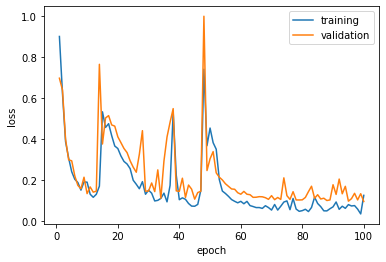

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### View the Learned Weights and Biases
The trained model consists of the final weights and biases that were determined by the optimizer during training. Based on our network model we should expect the following values for each layer:
* Layer 1: There are four input values going to ten output nodes, so there should be 10 x 4 weights and 10 bias values.
* Layer 2: There are ten input values going to ten output nodes, so there should be 10 x 10 weights and 10 bias values.
* Layer 3: There are ten input values going to three output nodes, so there should be 10 x 3 weights and 3 bias values.

In [8]:
for layer in model.layers:
    weights = layer.get_weights()[0]
    biases = layer.get_weights()[1]
    print('------------\nWeights:\n',weights,'\nBiases:\n', biases)

------------
Weights:
 [[ 0.66359913 -0.1381005   0.23302758 -0.10200619 -0.5588361  -0.41755947
  -0.05987466 -0.5404214  -0.7641028  -1.5272179 ]
 [ 0.9986595  -0.40084174 -0.22265223 -0.4912389   0.45909238  0.43307948
  -0.5060637   0.6204511  -0.5710333  -1.0653541 ]
 [-1.5406288  -0.35149497 -1.0331775   0.04971655  0.42589676  0.23938596
   0.11858001  0.2660036   0.465692    2.4300904 ]
 [-1.2313176   0.06501675 -0.28766632 -0.7201156  -0.46639693 -0.43694592
  -0.36370876 -0.43579397  0.4904694   2.3255384 ]] 
Biases:
 [ 3.2005280e-01  0.0000000e+00  7.6599739e-02 -5.3995516e-02
  0.0000000e+00  0.0000000e+00  1.7548913e-02 -7.6709426e-04
 -1.9515695e-01 -1.0843804e+00]
------------
Weights:
 [[ 0.31574288 -0.23709138 -0.05198707 -0.4947064   0.75271565 -0.22122666
  -0.02521807  1.2845099   0.87164783 -0.10448024]
 [-0.36164218  0.4799086  -0.00371093  0.35546446  0.45427144  0.4903922
   0.02182859 -0.04315138 -0.4047199   0.04984176]
 [ 0.34969187 -0.08815767  0.04670566  0

### Evaluate Model Performance
So, is the model any good? The raw accuracy reported from the validation data would seem to indicate that it predicts pretty well; but it's typically useful to dig a little deeper and compare the predictions for each possible class. A common way to visualize the performace of a classification model is to create a *confusion matrix* that shows a crosstab of correct and incorrect predictions for each class.

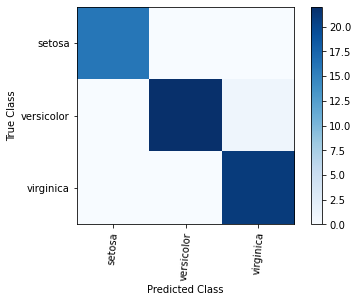

In [9]:
#Keras doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


class_probabilities = model.predict(x_test)
predictions = np.argmax(class_probabilities, axis=1)
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=85)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

The confusion matrix should show a strong diagonal line indicating that there are more correct than incorrect predictions for each class.

### Using the Model with New Data
Now that we have a model we believe is reasonably accurate, we can use it to predict the species of new iris observations:

In [10]:
x_new = np.array([[6.6,3.2,5.8,2.4]])
print ('New sample: {}'.format(x_new))

class_probabilities = model.predict(x_new)
predictions = np.argmax(class_probabilities, axis=1)

print(iris.target_names[predictions][0])

New sample: [[6.6 3.2 5.8 2.4]]
virginica


## Learn More
This notebook was designed to help you understand the basic concepts and principles involved in deep neural networks, using a simple Keras example. To learn more about Keras, take a look at the <a href="https://keras.io/" target="_blank">Keras web site</a>.